In [2]:
""" brownian motion """

import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
import util
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,10000
N = 10
C = 0
rho = 0.6
sigma = 0.01
dim = 1
idWin = False
actf="tanh"

rseed = 0

N_d = int(N * dim)

fn = "nl_timeCorr_wiener"
## store setting
setting = {"input dim":dim,"Two":Two, "Ttrain":Ttrain,"sigma":sigma,"rseed" : rseed, 
            "Nodes":N_d,"uC":C,"rho":rho, "actf":actf,"identical Win":idWin,"input dist":"brownian motion"}

print("settings stored:",setting)


settings stored: {'input dim': 1, 'Two': 2000, 'Ttrain': 10000, 'sigma': 0.01, 'rseed': 0, 'Nodes': 10, 'uC': 0, 'rho': 0.6, 'actf': 'tanh', 'identical Win': False, 'input dist': 'brownian motion'}


In [3]:

torch.manual_seed(0)

x = torch.normal(0,1,(1,Two+Ttrain),device="cuda:0")
u_sym = torch.tensor([[ torch.sum(x[:,:t+1],1) for t in range(Two+Ttrain)]])
u_tld = x


esn = ESN.ESN_mult(N_d,sigma=sigma, uC=C,rho=rho, dim=dim,rseed=0,idWin=idWin)


st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf=actf,bias=False)
print("runtime :",time.time()-st)


runtime : 1.8087377548217773


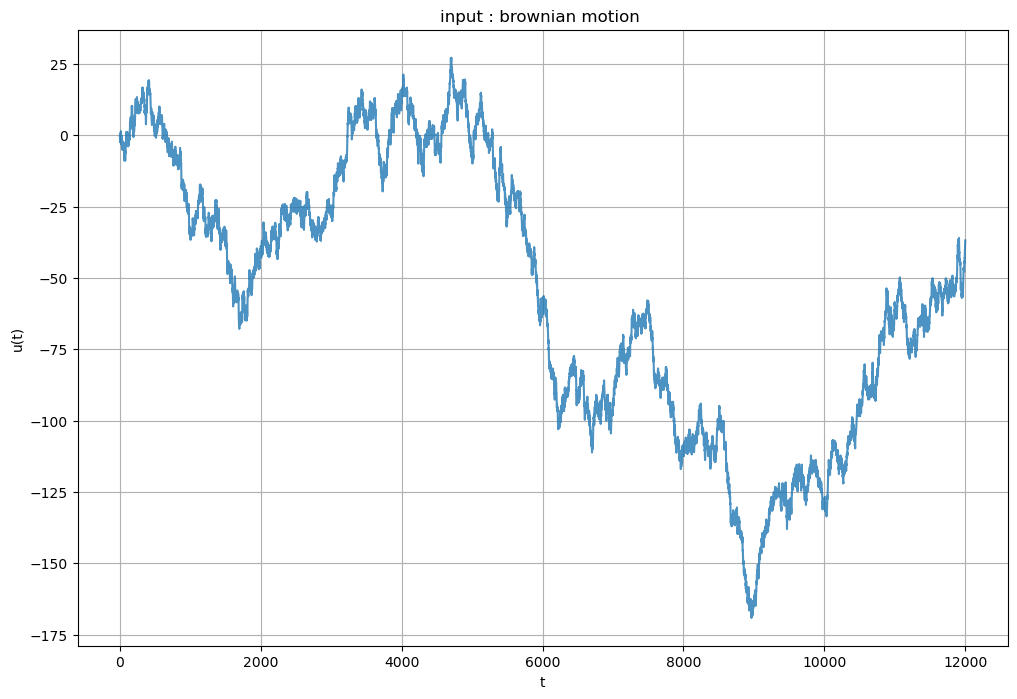

In [4]:
fig,ax = plt.subplots(figsize=(12,8))
T_len=100000
#T_len=-1
t=np.arange(Two+Ttrain)
for d in range(dim):
    plt.plot(t[-T_len:],u_sym[d][-T_len:].cpu().numpy(),alpha=0.8)
plt.xlabel("t")
plt.ylabel(r'u(t)')
plt.title('input : brownian motion ')
plt.grid(True)

In [5]:
## make targets
maxdd=[[1,20],
       [2,10],
       [3,10],
       [4,7],
       [5,7],
       [6,3],
       [7,2]]

In [7]:
if 1:
    st = time.time()
    tar_lgndr = ESN.make_targets(u=u_tld,maxddsets=maxdd,Two=Two,poly="legendre")
    print(r"target creation time:%.3f s"%(time.time()-st))
    
    
if 1 :
    st = time.time()
    raw_lgndr,thr_lgndr,thr_scl_lgndr,rev_lgndr,sur_lgndr = ESN.calc_capacity(Xwo,tar_lgndr.tar_f,ret_all=True,thr_scale=1.2,mean_normalization=True)
    print(r"ipc calc time :%.3f s"%(time.time()-st))

    print(sur_lgndr)

    ipc_lgndr = ESN.IPC_w_targetinfo(thr_scl_lgndr,tar_lgndr)

    util.print_ipc(ipc_lgndr)

basis table creation:0.001 s
1 degree:20 target functions
2 degree:55 target functions
3 degree:220 target functions
4 degree:210 target functions
5 degree:462 target functions
6 degree:28 target functions
7 degree:8 target functions
Total of 1003 bases
 7/7 degree bases now calculating ...
target creation complete, total of 1003 bases
target creation time:0.199 s
ipc calc time :0.176 s
tensor(0.0010, device='cuda:0')
1 deg ipc: 3.6379133623086686
2 deg ipc: 0.0
3 deg ipc: 7.762313596684564
4 deg ipc: 0.019674583644502173
5 deg ipc: 6.104932303124985
6 deg ipc: 0.03016756096634948
7 deg ipc: 0.36817133554566345
total ipc: 17.923172742274737


In [8]:
if 1:
    st = time.time()
    tar_tld= ESN.make_targets(u=u_tld,maxddsets=maxdd,Two=Two,poly="hermite")
    print(r"target creation time:%.3f s"%(time.time()-st))
    
    
if 1 :
    st = time.time()
    raw_tld,thr_tld,thr_scl_tld,rev_tld,sur_tld = ESN.calc_capacity(Xwo,tar_tld.tar_f,ret_all=True,thr_scale=1.2,mean_normalization=True)
    print(r"ipc calc time :%.3f s"%(time.time()-st))

    print(sur_tld)

    ipc_tld = ESN.IPC_w_targetinfo(thr_scl_tld,tar_tld)

    util.print_ipc(ipc_tld)

basis table creation:0.001 s
1 degree:20 target functions
2 degree:55 target functions
3 degree:220 target functions
4 degree:210 target functions
5 degree:462 target functions
6 degree:28 target functions
7 degree:8 target functions
Total of 1003 bases
 7/7 degree bases now calculating ...
target creation complete, total of 1003 bases
target creation time:0.175 s
ipc calc time :0.074 s
tensor(0.0010, device='cuda:0')
1 deg ipc: 3.6378799085380726
2 deg ipc: 0.0
3 deg ipc: 4.592923339193093
4 deg ipc: 0.016705467134419224
5 deg ipc: 1.8468004452444693
6 deg ipc: 0.03322349425169902
7 deg ipc: 0.02949074981880056
total ipc: 10.157023404180553


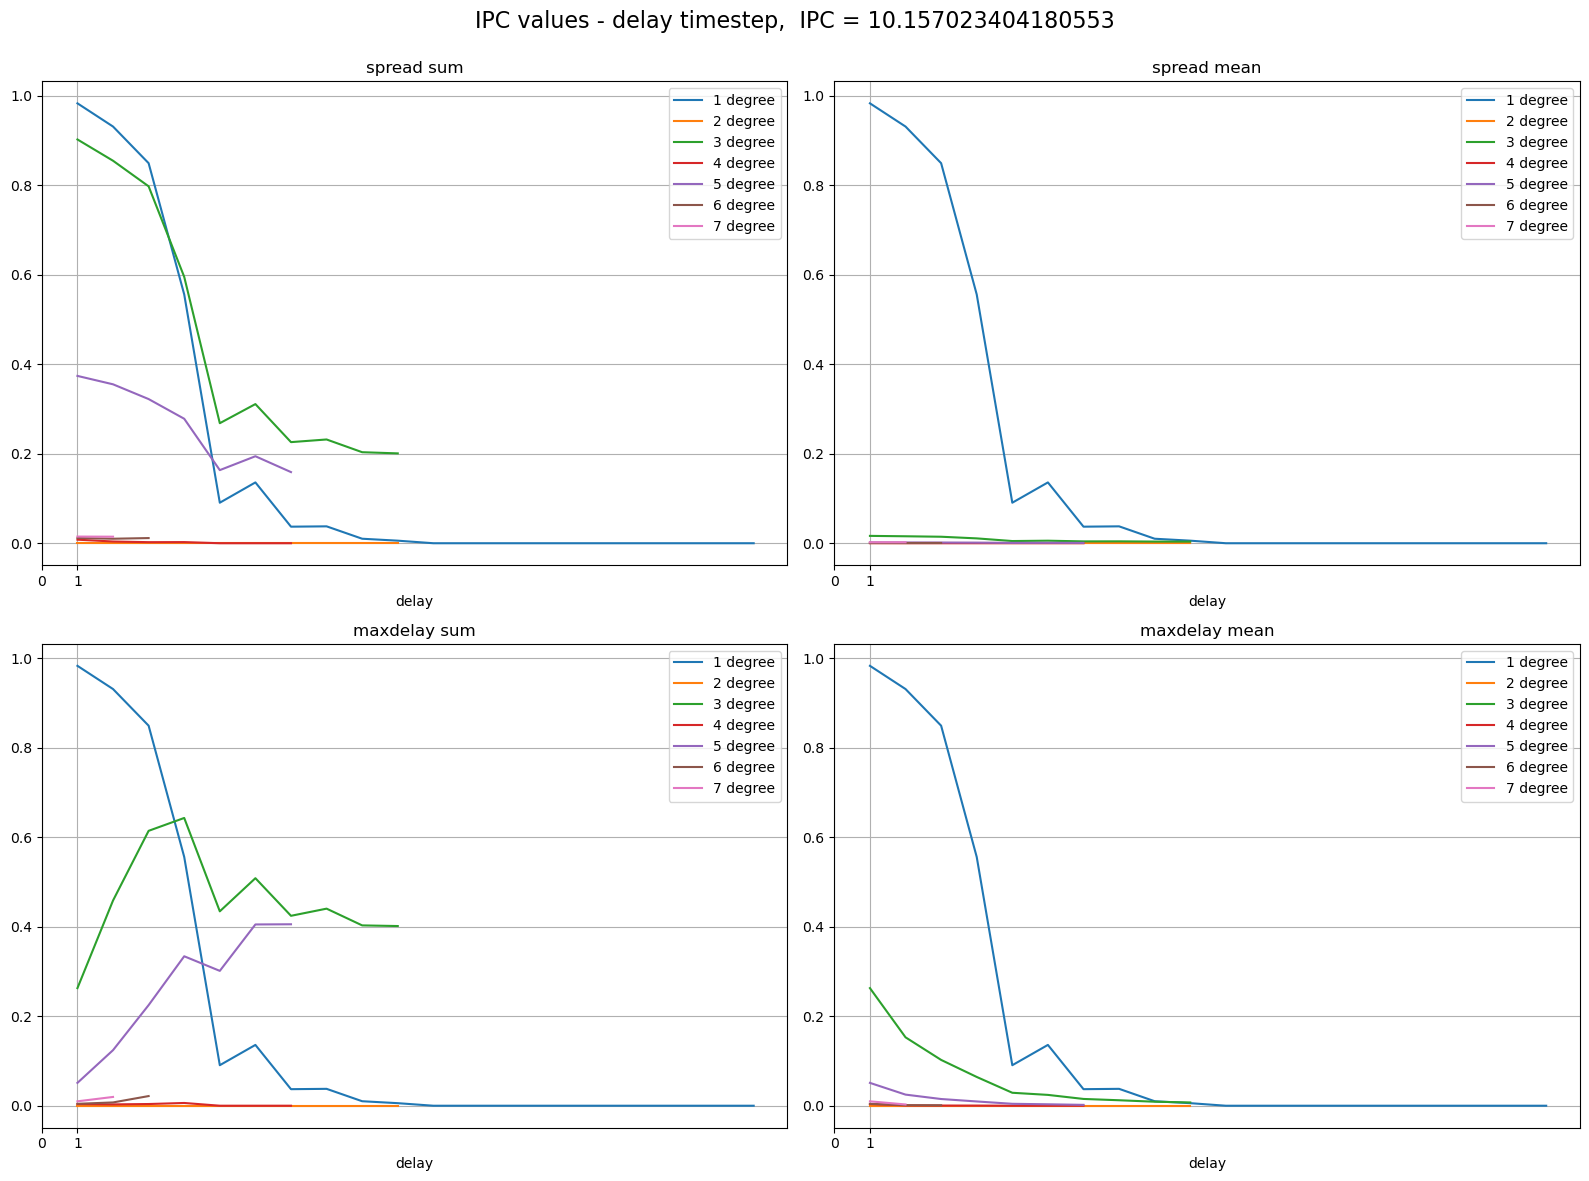

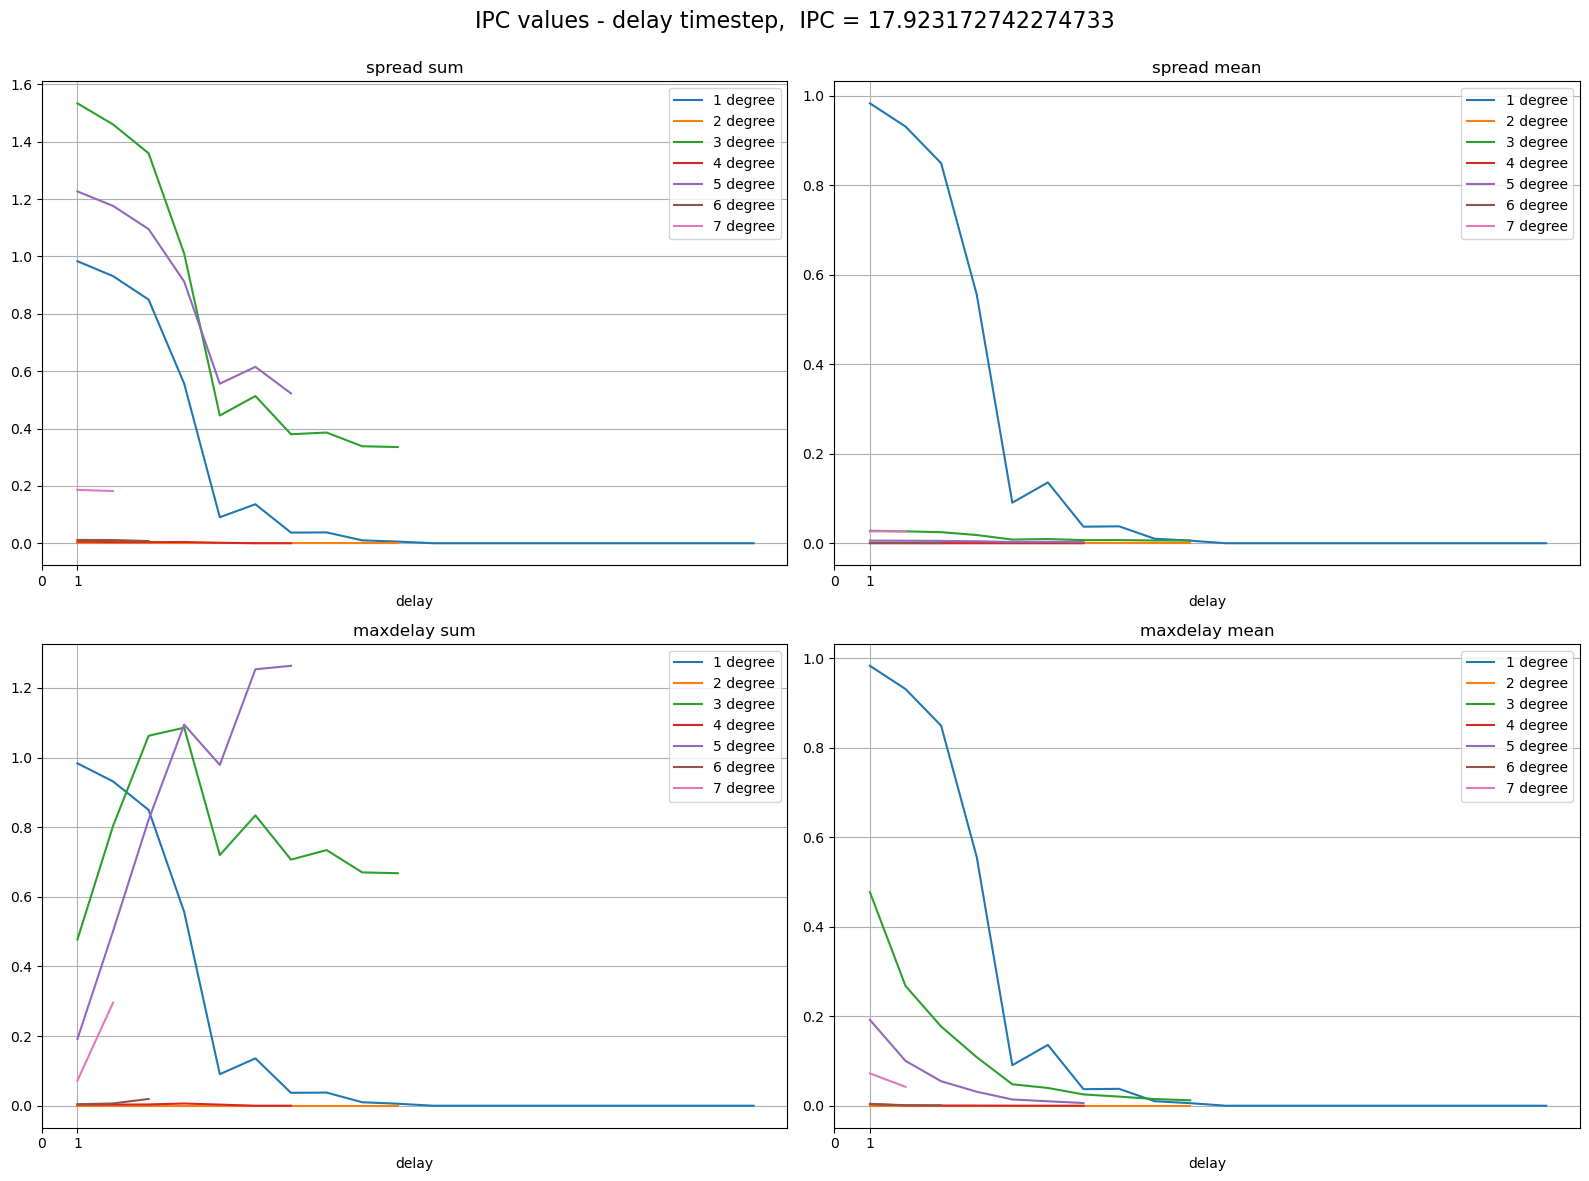

In [9]:
util.ipc_tau_plot(ipc_tld)
util.ipc_tau_plot(ipc_lgndr)
#util.ipc_tau_plot(ipc_naive)

In [ ]:
if 1 :
    st = time.time()
    
    tar_naive = ESN.make_targets(u=u_sym,maxddsets=maxdd,Two=Two,poly=_?_?_?_?_)
    
    print(r"target creation time:%.3f s"%(time.time()-st))


if 1 :
    st = time.time()
    raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,tar_naive.tar_f,ret_all=True,thr_scale=1.2,mean_normalization=True)
    print(r"ipc calc time :%.3f s"%(time.time()-st))

    print(sur)

    ipc_naive = ESN.IPC_w_targetinfo(raw,tar_naive)

    util.print_ipc(ipc_naive)